In [95]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import rasterio
import pandas as pd


In [96]:
#Longitude and Latitude of All Nigerian States
nigeria_states = {
    "Abia": (5.532, 7.486),
    "Adamawa": (9.326, 12.398),
    "Akwa Ibom": (4.975, 8.341),
    "Anambra": (6.210, 7.072),
    "Bauchi": (10.310, 9.845),
    "Bayelsa": (4.926, 6.267),
    "Benue": (7.336, 8.741),
    "Borno": (11.847, 13.157),
    "Cross River": (5.963, 8.334),
    "Delta": (5.704, 5.933),
    "Ebonyi": (6.264, 8.013),
    "Edo": (6.524, 5.926),
    "Ekiti": (7.623, 5.220),
    "Enugu": (6.524, 7.395),
    "Gombe": (10.290, 11.168),
    "Imo": (5.476, 7.025),
    "Jigawa": (12.170, 9.625),
    "Kaduna": (10.510, 7.429),
    "Kano": (12.002, 8.591),
    "Katsina": (12.988, 7.617),
    "Kebbi": (11.433, 4.201),
    "Kogi": (7.802, 6.733),
    "Kwara": (8.967, 4.562),
    "Lagos": (6.524, 3.379),
    "Nasarawa": (8.528, 8.547),
    "Niger": (9.601, 6.556),
    "Ogun": (6.908, 3.627),
    "Ondo": (7.254, 5.194),
    "Osun": (7.562, 4.572),
    "Oyo": (8.157, 3.614),
    "Plateau": (9.963, 9.184),
    "Rivers": (4.837, 6.911),
    "Sokoto": (13.060, 5.240),
    "Taraba": (8.890, 11.354),
    "Yobe": (12.000, 11.500),
    "Zamfara": (12.166, 6.233)
}



#Solar Energy Data information Sources
energy_data_parameters = {
    "DNI": "Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/DNI.tif",
    "DIF": "Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/DIF.tif",
    "GHI": "Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/GHI.tif",
    "OPTA": "Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/OPTA.tif",
    "PVOUT": "Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif",
    "TEMP": "Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/TEMP.tif"
}


In [97]:
# Dictionary to store results
solar_data = {state: {"Latitude": lat, "Longitude": lon} for state, (lat, lon) in nigeria_states.items()}

# Loop through each energy parameter
for parameter, file_path in energy_data_parameters.items():
    print(f"Processing {parameter} from {file_path}...")

    try:
        # Load the GeoTIFF file
        with rasterio.open(file_path) as dataset:
            for state, (lat, lon) in nigeria_states.items():
                try:
                    # Convert latitude & longitude to raster row and column
                    row, col = dataset.index(lon, lat)
                    
                    # Extract energy value for the state
                    energy_value = dataset.read(1)[row, col]
                    
                    # Store in dictionary
                    solar_data[state][parameter] = energy_value

                except IndexError:
                    print(f"Error: {state} coordinates {lat}, {lon} out of raster bounds.")
                    solar_data[state][parameter] = None  # Assign NaN for missing values

    except Exception as e:
        print(f"Error loading {parameter}: {e}")

# Convert dictionary to Pandas DataFrame
df = pd.DataFrame.from_dict(solar_data, orient="index")

# Save results to CSV
csv_filename = "Files/nigeria_solar_energy_data.csv"
df.to_csv(csv_filename, index=True)

print(f"\nSolar energy data saved to {csv_filename}")
print(df.head())  # Print sample data for verification

Processing DNI from Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/DNI.tif...
Processing DIF from Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/DIF.tif...
Processing GHI from Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/GHI.tif...
Processing OPTA from Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/OPTA.tif...
Processing PVOUT from Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif...
Processing TEMP from Data Sources/Nigeria_GISdata_LTAym_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/Nigeria_GISdata_LTAy_AvgDailyT

In [98]:
# Read the CSV file
df = pd.read_csv('Files/nigeria_solar_energy_data.csv')

# Rename the index column to 'State'
df = df.rename(columns={'Unnamed: 0': 'State'})

# Save back to CSV
df.to_csv('Files/nigeria_solar_energy_data.csv', index=False)

In [99]:


# Load the Shapefile
gdf = gpd.read_file("Data Sources/geoBoundaries-NGA-ADM1-all/geoBoundaries-NGA-ADM1_simplified.shp")

# Save as GeoJSON
gdf.to_file("Files/nigeria_states.geojson", driver="GeoJSON")

print("GeoJSON file saved successfully!")


GeoJSON file saved successfully!


Processing DNI...


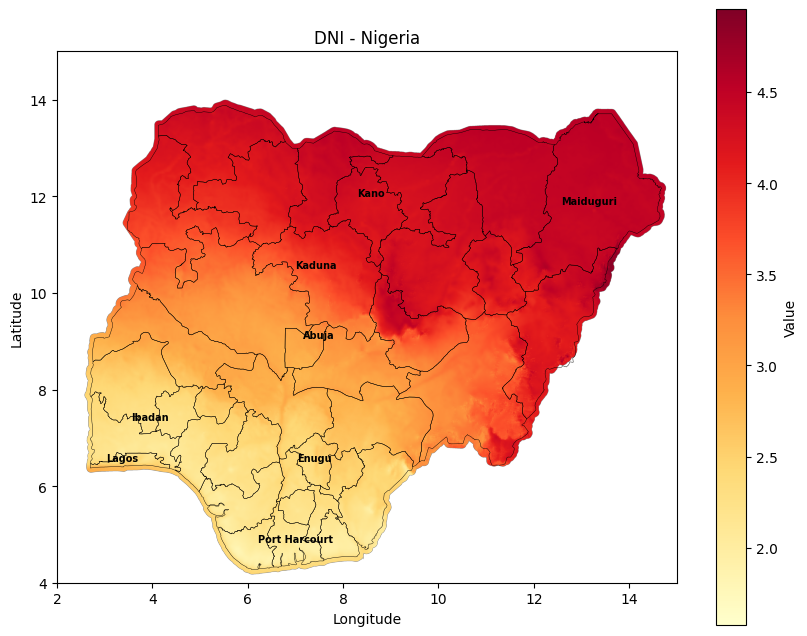

Heatmap saved: Images/heatmap_DNI.png
Processing DIF...


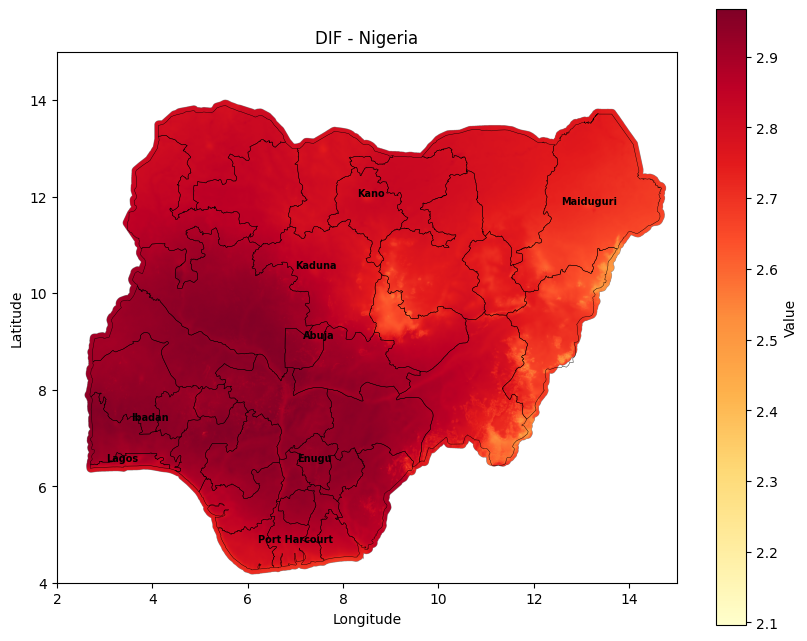

Heatmap saved: Images/heatmap_DIF.png
Processing GHI...


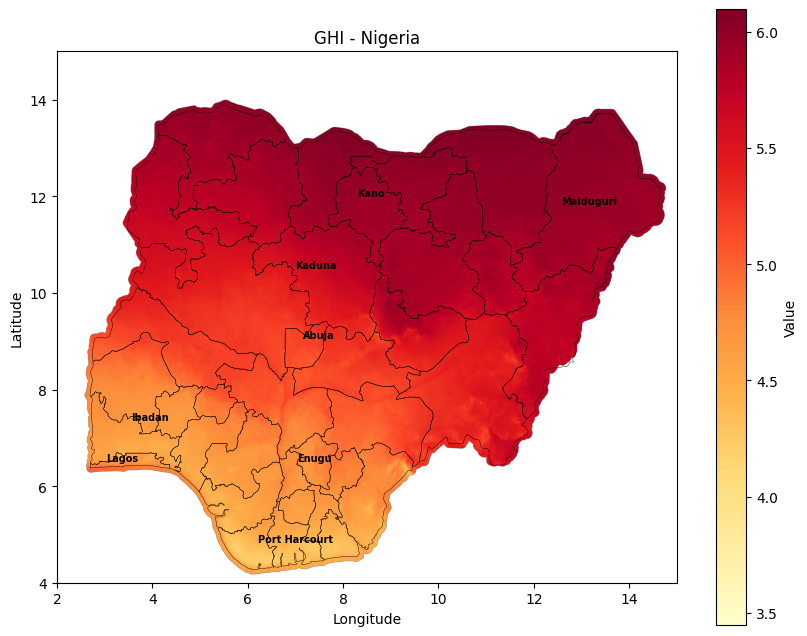

Heatmap saved: Images/heatmap_GHI.png
Processing OPTA...


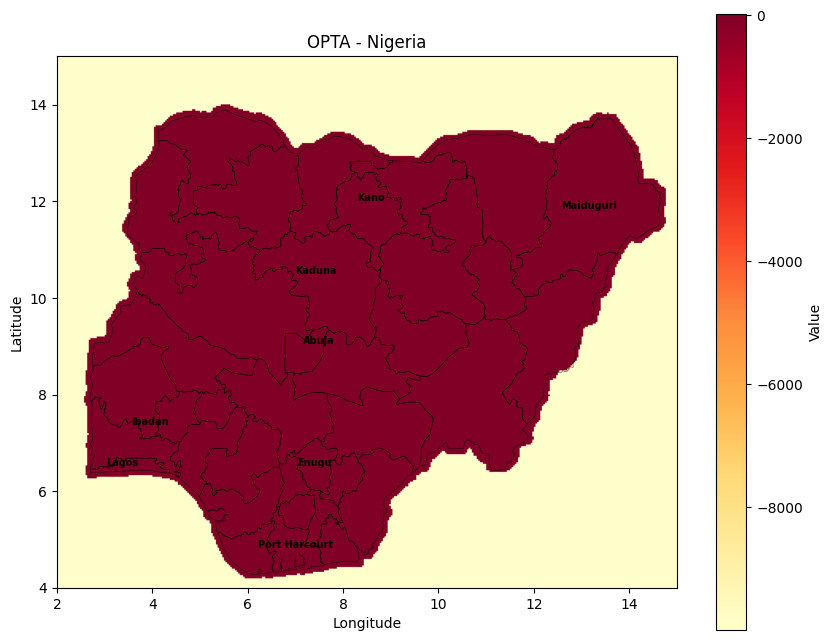

Heatmap saved: Images/heatmap_OPTA.png
Processing PVOUT...


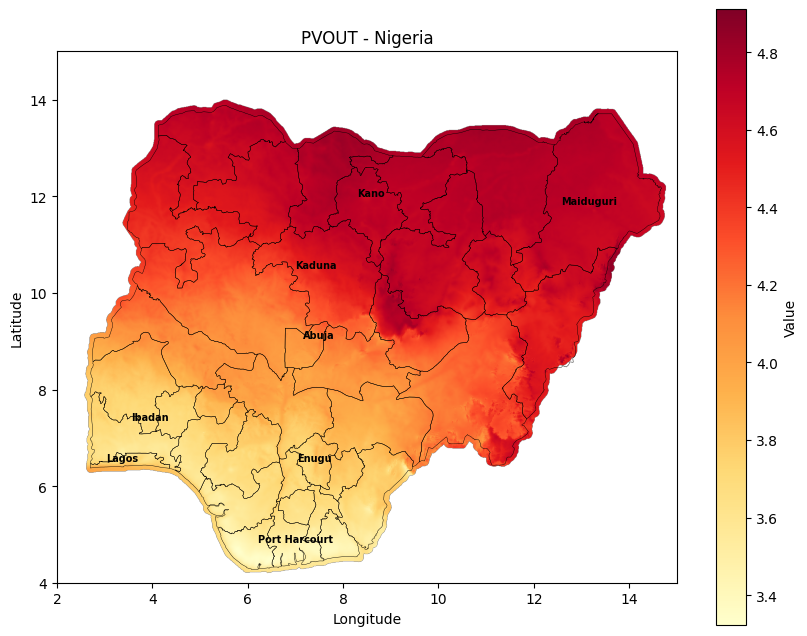

Heatmap saved: Images/heatmap_PVOUT.png
Processing TEMP...


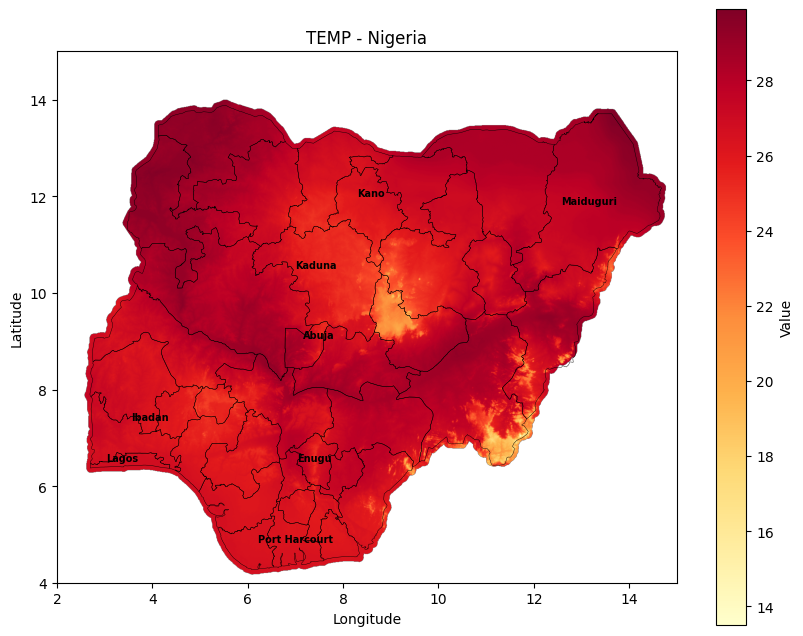

Heatmap saved: Images/heatmap_TEMP.png


In [100]:
# Load Nigeria state boundaries (Ensure this is a valid GeoJSON or Shapefile)
nigeria_states = gpd.read_file("Files/nigeria_states.geojson")

# Confirm that nigeria_states is a GeoDataFrame
if not isinstance(nigeria_states, gpd.GeoDataFrame):
    raise ValueError("Error: nigeria_states is not a valid GeoDataFrame. Please check the GeoJSON file.")

# Define major states and their approximate center coordinates for labeling
major_states = {
    "Lagos": (6.524, 3.379),
    "Abuja": (9.057, 7.495),
    "Kano": (12.002, 8.591),
    "Port Harcourt": (4.837, 7.010),
    "Ibadan": (7.377, 3.947),
    "Kaduna": (10.510, 7.429),
    "Enugu": (6.524, 7.395),
    "Maiduguri": (11.847, 13.157)
}



# Loop through each energy parameter to generate heatmaps
for parameter, file_path in energy_data_parameters.items():
    print(f"Processing {parameter}...")

    try:
        # Open the raster file
        with rasterio.open(file_path) as dataset:
            data = dataset.read(1)  # Extract raster values
            bounds = dataset.bounds  # Get geographical bounds

        # Create Figure
        fig, ax = plt.subplots(figsize=(10, 8))

        # Plot Solar Parameter Heatmap
        img = ax.imshow(data, cmap="YlOrRd", extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])

        # Overlay Nigeria State Boundaries
        nigeria_states.boundary.plot(ax=ax, edgecolor="black", linewidth=0.3)

        # Add State Labels to Map
        for state, (lat, lon) in major_states.items():
            ax.text(lon, lat, state, fontsize=7, ha="center", color="black", fontweight="semibold")

        # Set Titles & Labels
        plt.title(f"{parameter} - Nigeria")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.colorbar(img, label="Value")
        plt.show()

        # Save Heatmap as PNG
        output_file = f"Images/heatmap_{parameter}.png"
        plt.savefig(output_file, dpi=300)
        plt.close()

        print(f"Heatmap saved: {output_file}")

    except Exception as e:
        print(f"Error processing {parameter}: {e}")